# Packet Based Markovian Model for steady state throughput of CUBIC and Hybla



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ccaModels import CCA_MarkovChain_CUBIC_OG, CCA_MarkovChain_Hybla_discrete, CCA_MarkovChain_Hybla, CCA_MarkovChain_CUBIC_discrete

#plt.rcParams['text.usetex'] = True
#plt.rcParams.update(plt.rcParamsDefault)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


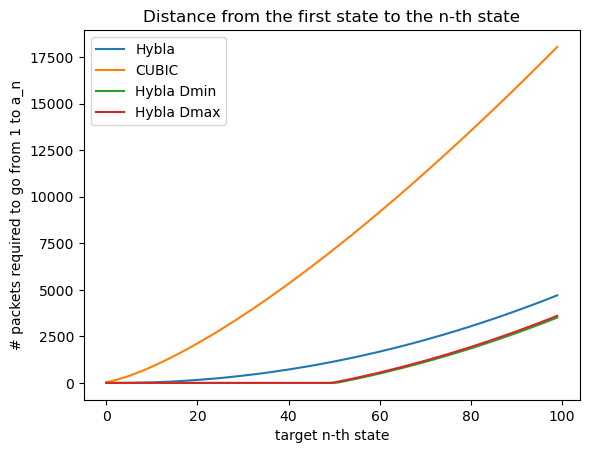

1.0
25.0


In [3]:
hyb = CCA_MarkovChain_Hybla_discrete(packet_err=0.0006,beta=0.5,N=100,C =1000, RTT_est=0.2, RTT_real = 0.5, RTT0=0.1)
cub = CCA_MarkovChain_CUBIC_discrete(packet_err = 0.0006, beta=0.5,N=100,C =1000, RTT_est=0., RTT_real = 0.5,alpha=0.001)

a = 1
d = np.zeros(100)
dc = np.zeros(100)
for i,ai in enumerate(hyb.a):
    d[i] = hyb.D(1,ai)
for i,ai in enumerate(cub.a):
    dc[i] = cub.D(1,ai)
plt.title("Distance from the first state to the n-th state")
plt.ylabel("# packets required to go from 1 to a_n")
plt.xlabel("target n-th state")
plt.plot(d,label="Hybla") 
plt.plot(dc,label="CUBIC")
plt.plot(hyb.Dmin[50,:], label = "Hybla Dmin")
plt.plot(hyb.Dmax[50,:], label = "Hybla Dmax")
plt.legend()             
plt.show()
print(hyb.Dmin[50,50])
print(hyb.Dmax[50,50])

Rho is equal to 10.0
Average throughput is 3278.5744692644616


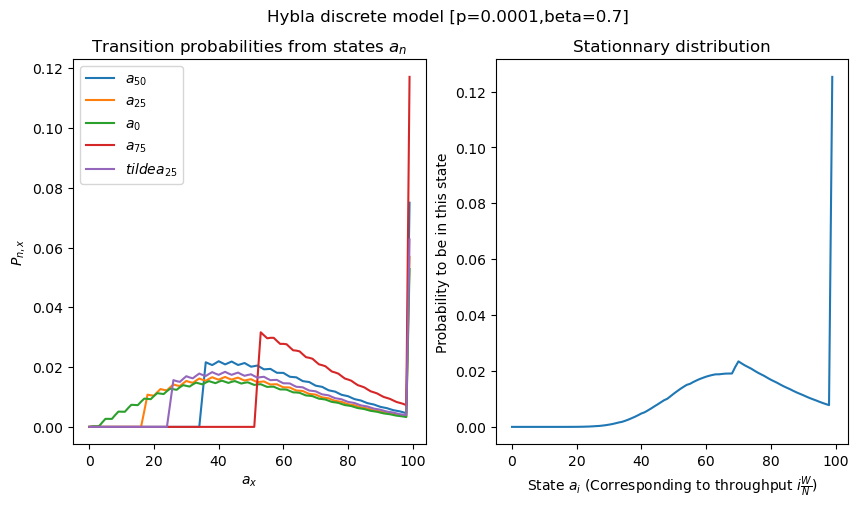

In [7]:
p = 0.0001
b = 0.7
wired = CCA_MarkovChain_Hybla_discrete(packet_err=p,beta=b,N=100,C = 5000, RTT_est=0.2, RTT_real = 0.5, RTT0=0.05)
wired.avg_throughput()
print(f"Rho is equal to {wired.rho}")
print(f"Average throughput is {wired.ssThroughput}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = "$a_{50}$")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "$a_{25}$")
axs[0].plot(np.arange(wired.N),wired.P[0,:],label = "$a_{0}$")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = "$a_{75}$")
axs[0].plot(np.arange(wired.N),wired.Ptilde[25,:],label = "$tilde a_{25}$")
axs[0].set_title(r"Transition probabilities from states $a_n$")
axs[0].set_ylabel(r"$P_{n,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle(f"Hybla discrete model [p={p},beta={b}]")
plt.show()

0.001 835.4950498734188
0.028183829312644536 529.4323726635156
0.7943282347242815 196.41618186263355


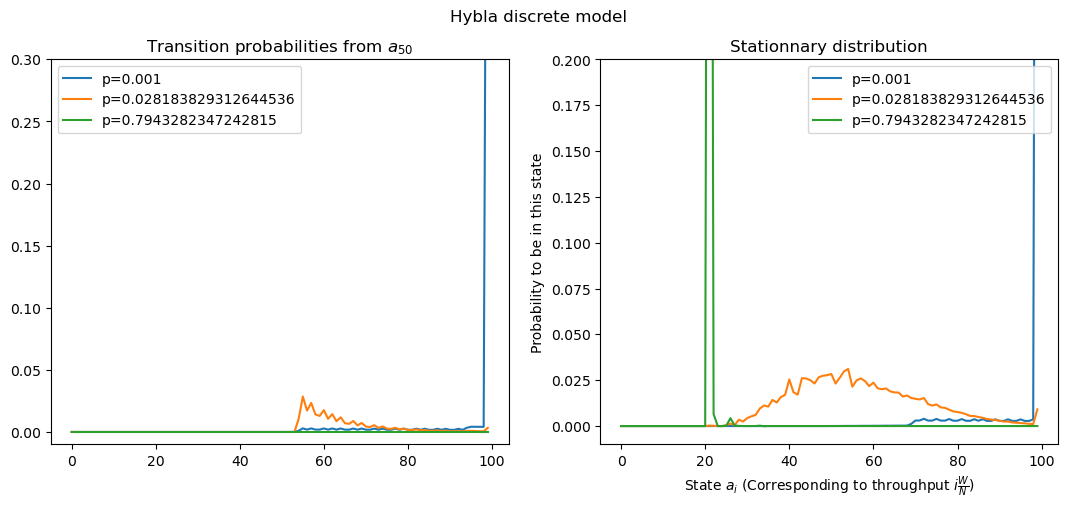

In [8]:
wired = CCA_MarkovChain_Hybla_discrete(packet_err=0.001,beta=0.7,N=100,C = 1000,RTT_est=0.1, RTT_real = 0.25, RTT0=0.025)
ps = np.logspace(-3,-0.1,3)
fig, axs = plt.subplots(1, 2, figsize=(13,5))
for i in ps:
    wired.packet_err = i
    wired.compute_stationnary_distribution()
    axs[0].plot(np.arange(wired.N),wired.P[20,:],label=f"p={i}")
    axs[1].plot(np.arange(wired.N),wired.pi,label=f"p={i}")
    print(i, wired.avg_throughput())

axs[1].set_title(r"Stationnary distribution")
axs[0].set_title(r"Transition probabilities from $a_{50}$")
axs[1].set_ylim(-0.01,0.2)
axs[0].set_ylim(-0.01,0.3)
#axs[0].set_xlim(10,15)
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
axs[1].legend()
axs[0].legend()
fig.suptitle(f"Hybla discrete model")
plt.show()

0.0001 730.7254218758663
0.001995262314968879 176.15717410453388
0.039810717055349734 20.105907948951717
0.7943282347242815 4.625000150699968


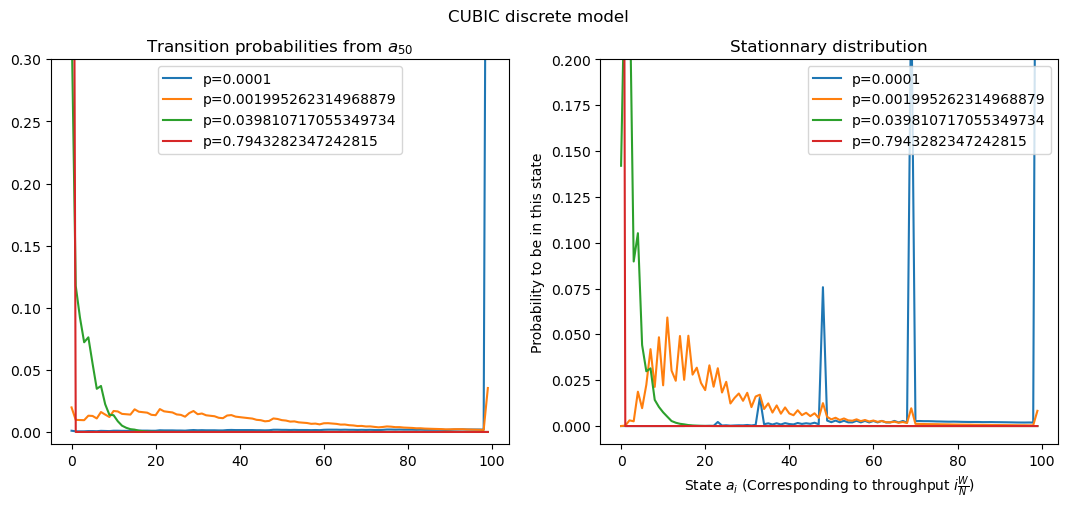

In [9]:
wired = CCA_MarkovChain_CUBIC_discrete(packet_err=0.1,beta=0.7,N=100,C = 1000,RTT_est=0.1, RTT_real = 0.5)
ps = np.logspace(-4,-0.1,4)
fig, axs = plt.subplots(1, 2, figsize=(13,5))
for i in ps:
    wired.packet_err = i
    wired.compute_stationnary_distribution()
    axs[0].plot(np.arange(wired.N),wired.P[0,:],label=f"p={i}")
    axs[1].plot(np.arange(wired.N),wired.pi,label=f"p={i}")
    print(i, wired.avg_throughput())

axs[1].set_title(r"Stationnary distribution")
axs[0].set_title(r"Transition probabilities from $a_{50}$")
axs[1].set_ylim(-0.01,0.2)
axs[0].set_ylim(-0.01,0.3)
#axs[0].set_xlim(10,15)
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
axs[1].legend()
axs[0].legend()
fig.suptitle(f"CUBIC discrete model")
plt.show()

2.5 to 5.0. U =0.1 Uf=0.0 D = 0 = 0
252.5 to 255.0. U =0.1 Uf=0.0 D = 25 = 25
377.5 to 380.0. U =0.1 Uf=0.0 D = 37 = 37
2.5 to 5.0. U =0.1 Uf=0.0 D = 0 = 0
252.5 to 255.0. U =0.1 Uf=0.0 D = 25 = 25
377.5 to 380.0. U =0.1 Uf=0.0 D = 37 = 37


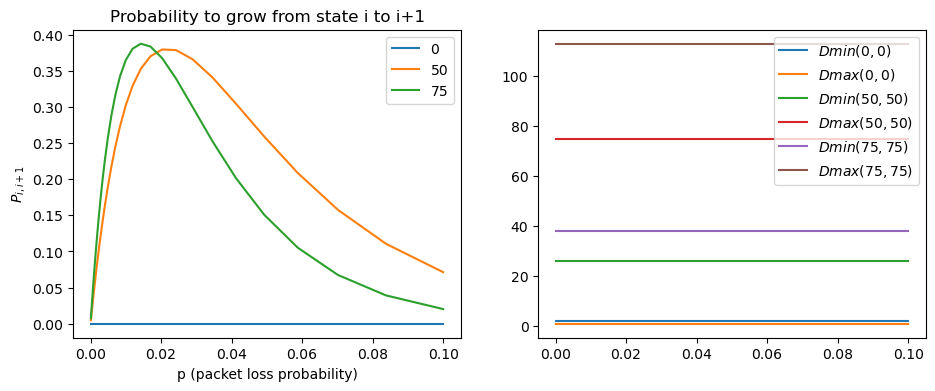

In [9]:
hyb = CCA_MarkovChain_Hybla_discrete(packet_err=0.,beta=0.7,N=100,C =1000, RTT_est=0.2, RTT_real = 0.5, RTT0=0.1)
probij = np.zeros((40,3))
ps = np.logspace(-4,-1,40)
probe_states = [0,50,75]
d_mins = np.zeros((40,3))
d_maxs = np.zeros((40,3))
for i,p in enumerate(ps):
    hyb.packet_err = p
    hyb.compute_stationnary_distribution()
    for j,start in enumerate(probe_states):
        probij[i,j] = hyb.Ptilde[start,start+1]
        d_mins[i,j] = hyb.Dmin[start,start+1]
        d_maxs[i,j] = hyb.Dmax[start,start+1]
        if i%20==0:
            a = hyb.a[start]
            b = (start+1)*hyb.W/hyb.N
            U = (b-a)/hyb.rho**2
            Uf = np.floor(U)
            print(f"{a} to {b}. U ={U} Uf={Uf} D = {int(U*(a+Uf*hyb.rho**2)-hyb.rho**2*(Uf+Uf**2)/2)} = {hyb.D(hyb.a[start],(start+1)*hyb.W/hyb.N)}")
#also do a plot for the nmin and nmax starting from these 3 states,
fig, axs = plt.subplots(1, 2, figsize=(11,4))
for a,b in enumerate(probe_states):
    axs[1].plot(ps,d_mins[:,a],label = f"$Dmin({b},{b})$")
    axs[1].plot(ps,d_maxs[:,a],label = f"$Dmax({b},{b})$")
    axs[0].plot(ps,probij[:,a], label = f"{b}")
axs[0].set_title(f"Probability to grow from state i to i+1")
axs[0].set_xlabel("p (packet loss probability)")
axs[0].set_ylabel("$P_{i,i+1}$")
axs[0].legend()
axs[1].legend()

/Users/jeanmegret/OneDrive - Nexus365/Dissertation/qpepcca/ccaModels.py:333: RuntimeWarning: invalid value encountered in divide
  self.pi = np.real(vs/vs.sum())[:,0]


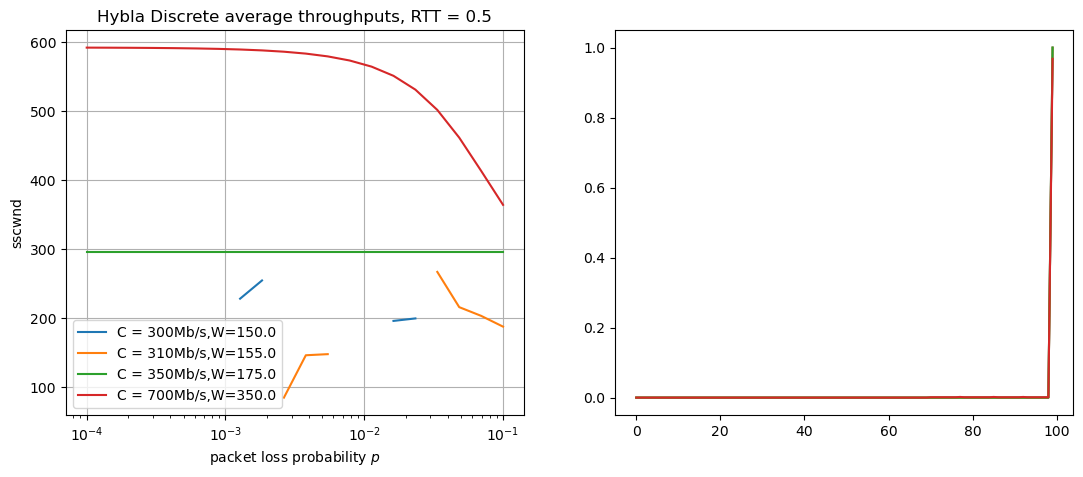

In [5]:
err_rates = np.logspace(-4,-1,20)
bandwidths = [300,310,350,700]
RTT = 0.5
throughputs = np.zeros([len(bandwidths),len(err_rates)])
sdistr = np.zeros([len(bandwidths),100])
for k,C in enumerate(bandwidths):
    sdistr[k,:] = CCA_MarkovChain_Hybla_discrete(packet_err=1e-3,beta=0.7,N=100,C = C,RTT_real=RTT, RTT0=0.025).compute_stationnary_distribution()
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_discrete(packet_err=l,beta=0.7,N=100,C = C,RTT_real=RTT, RTT0=0.025)
        throughputs[k,i] = wireless.avg_throughput()
fig, axs = plt.subplots(1, 2, figsize=(13,5))
for k,C in enumerate(bandwidths):
    axs[0].plot(err_rates,throughputs[k,:], label = f"C = {C}Mb/s,W={RTT*C}")
    axs[1].plot(np.arange(wireless.N),sdistr[k])
axs[0].semilogx()
axs[0].legend()
axs[0].grid()
axs[0].set_title(f"Hybla Discrete average throughputs, RTT = {RTT}")
axs[0].set_xlabel(r"packet loss probability $p$")
axs[0].set_ylabel(r'sscwnd')
plt.show()

Average throughput is 20.00752325287314


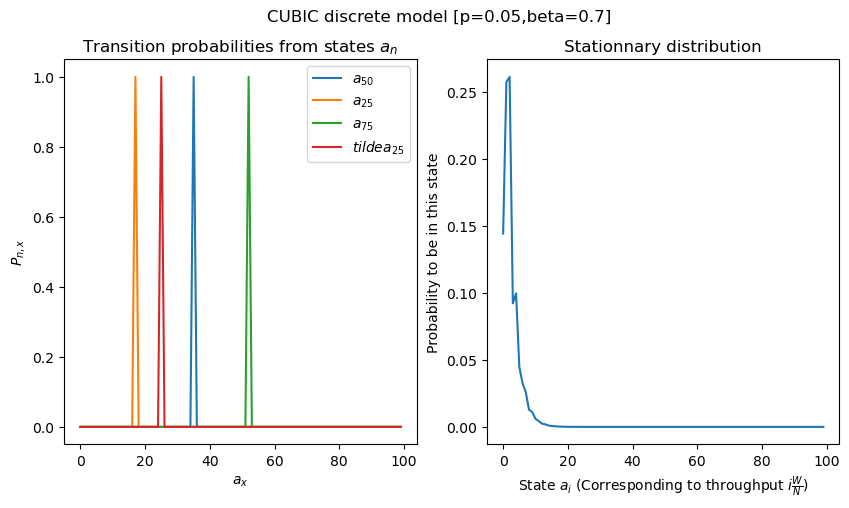

In [10]:
p = 0.05
b = 0.7
wired = CCA_MarkovChain_CUBIC_discrete(packet_err=p,beta=b,N=100,C =1000, RTT_est=0.2, RTT_real = 0.21)
wired.avg_throughput()
print(f"Average throughput is {wired.ssThroughput}")

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.arange(wired.N),wired.P[50,:],label = "$a_{50}$")
axs[0].plot(np.arange(wired.N),wired.P[25,:],label = "$a_{25}$")
axs[0].plot(np.arange(wired.N),wired.P[75,:],label = "$a_{75}$")
axs[0].plot(np.arange(wired.N),wired.Ptilde[25,:],label = "$tilde a_{25}$")
axs[0].set_title(r"Transition probabilities from states $a_n$")
axs[0].set_ylabel(r"$P_{n,x}$")
axs[0].set_xlabel(r"$a_x$")
axs[0].legend()
axs[1].plot(np.arange(wired.N),wired.pi)
axs[1].set_title(r"Stationnary distribution")
axs[1].set_xlabel(r"State $a_i$ (Corresponding to throughput $i\frac{W}{N}$)")
axs[1].set_ylabel(r'Probability to be in this state')
fig.suptitle(f"CUBIC discrete model [p={p},beta={b}]")
plt.show()

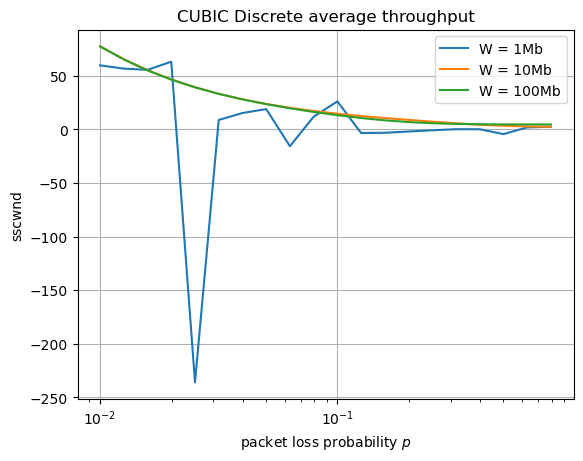

In [4]:
err_rates = np.logspace(-2,-0.1,20)
throughputs = np.zeros([3,len(err_rates)])
for k,C in enumerate([100,500,1000]):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_CUBIC_discrete(packet_err=l,beta=0.7,N=100,C = C,RTT_real=0.1)
        throughputs[k,i] = wireless.avg_throughput()

plt.plot(err_rates,throughputs[0,:], label = "W = 1Mb")
plt.plot(err_rates,throughputs[1,:], label = "W = 10Mb")
plt.plot(err_rates,throughputs[2,:], label = "W = 100Mb")
plt.semilogx()
plt.legend()
plt.grid()
plt.title(r"CUBIC Discrete average throughput")
plt.xlabel(r"packet loss probability $p$")
plt.ylabel(r'sscwnd')
plt.show()

How do they depend on different RTTs?

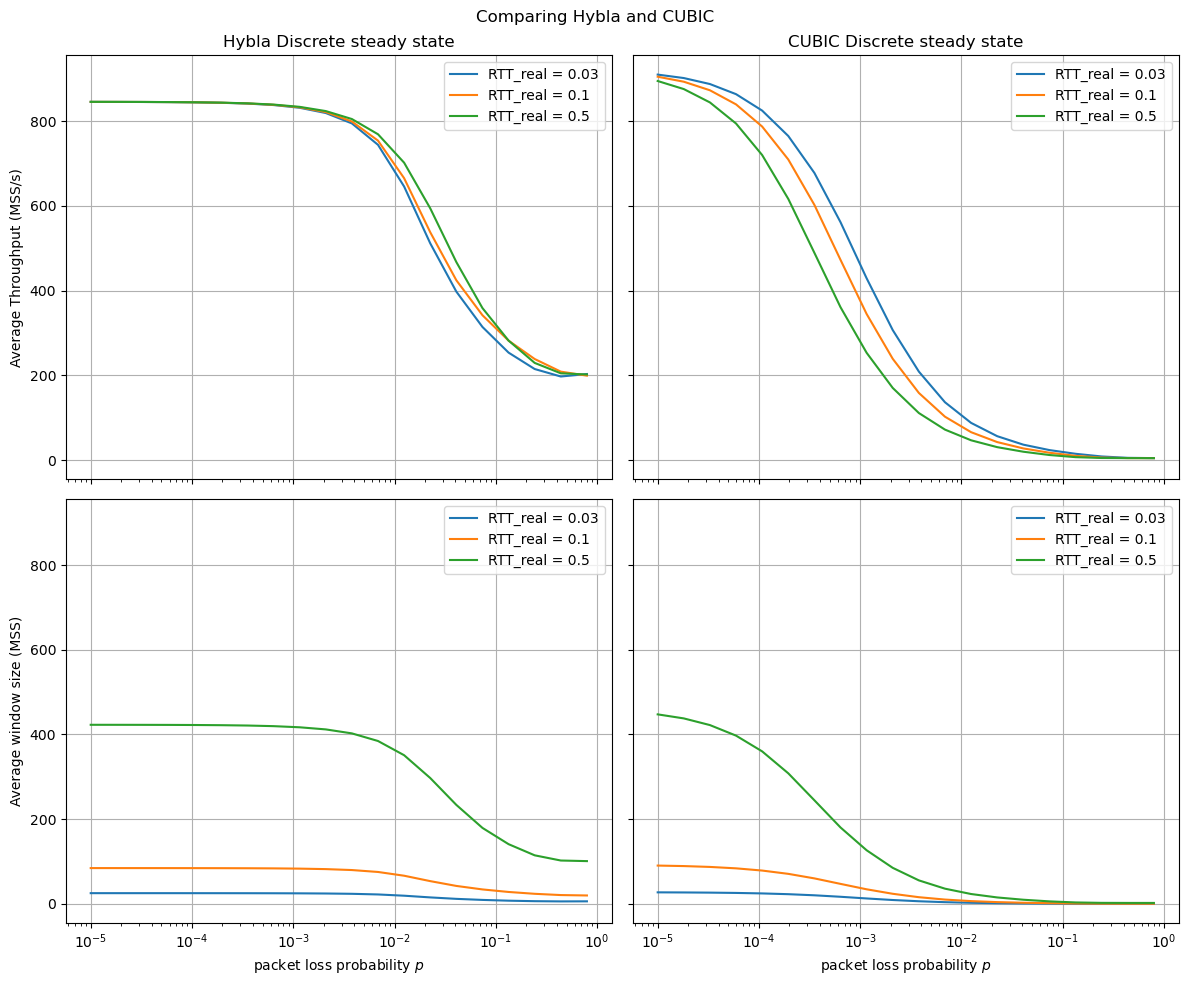

In [10]:
err_rates = np.logspace(-5,-0.1,20)
RTTs = [0.03, 0.1,0.5]
throughputs = np.zeros([len(RTTs),len(err_rates),4])

for k,R in enumerate(RTTs):
    for i, l in enumerate(err_rates):
        wireless = CCA_MarkovChain_Hybla_discrete(packet_err=l,beta=0.7,N=100,C = 1000,RTT_real=R, RTT0=0.025)
        cubic = CCA_MarkovChain_CUBIC_discrete(packet_err=l,beta=0.7,N=100,C = 1000,RTT_real=R)
        throughputs[k,i,0] = wireless.avg_throughput()
        throughputs[k,i,1] = cubic.avg_throughput()
    throughputs[k,:,2] = throughputs[k,:,0]*R
    throughputs[k,:,3] = throughputs[k,:,1]*R

fig, axs = plt.subplots(2, 2, figsize=(12,10),sharex=True, sharey=True)
for k,R in enumerate(RTTs):
    axs[0,0].plot(err_rates,throughputs[k,:,0], label = f"RTT_real = {R}")
    axs[0,1].plot(err_rates,throughputs[k,:,1], label = f"RTT_real = {R}")
    axs[1,0].plot(err_rates,throughputs[k,:,2], label = f"RTT_real = {R}")
    axs[1,1].plot(err_rates,throughputs[k,:,3], label = f"RTT_real = {R}")
axs[0,0].semilogx()
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r"Hybla Discrete steady state")
axs[0,0].set_ylabel(r'Average Throughput (MSS/s)')
axs[0,1].semilogx()
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r"CUBIC Discrete steady state")
axs[1,0].semilogx()
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_xlabel(r"packet loss probability $p$")
axs[1,0].set_ylabel(r'Average window size (MSS)')
axs[1,1].semilogx()
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_xlabel(r"packet loss probability $p$")
fig.suptitle("Comparing Hybla and CUBIC")
fig.tight_layout()
plt.show()